#Задание:

Загрузите данные по ЕГЭ за последние годы
https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv
выберите данные за 2018-2019 учебный год.
Выберите тип диаграммы для отображения результатов по административному округу Москвы, постройте выбранную диаграмму для количества школьников, написавших ЕГЭ на 220 баллов и выше.
Выберите тип диаграммы и постройте ее для районов Северо-Западного административного округа Москвы для количества школьников, написавших ЕГЭ на 220 баллов и выше.

#Подключение библиотек и загрузка данных

In [227]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv ", delimiter= ';')


# Очистка и предобработка данных 
1. Удалим из фрейма значения na а так же отфильтруем его по году.
2. Для выполнения первой части задания создадим фрейм, содержащий 2 столбца : округ и следнее значение количества сдавших ЕГЭ на 220+
3. для выполнения второй части задания отфильнтруеи данные по 'Северо-Западный административный округ', и создадим датафрейм содержащий его районы и среднее значение количества сдавших ЕГЭ на 220+


In [228]:
data = data.dropna(axis=1)
data = data.loc[data["YEAR"].isin(['2018-2019'])] 
data["District"] = data["District"].str.replace("район ","").astype("category")
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0]).astype("category")

adm_msk = pd.DataFrame([data['AdmArea'],data['PASSES_OVER_220']])
adm_msk = data.groupby("AdmArea").sum()["PASSES_OVER_220"].round()
adm_msk = pd.DataFrame(adm_msk)
adm_msk

,PASSES_OVER_220
AdmArea,
Восточный,2150
Западный,2944
Зеленоградский,516
Новомосковский,242
Северный,1973
Северо-Восточный,1982
Северо-Западный,1716
Троицкий,209
Центральный,4067


In [253]:
dist_sz = data.loc[data['AdmArea'] == 'Северо-Западный']
dist_sz = pd.DataFrame([dist_sz['District'],dist_sz['PASSES_OVER_220']])
dist_sz =dist_sz.transpose()
dist_sz = dist_sz.groupby("District").sum()["PASSES_OVER_220"].round()

dist_sz 

District
Куркино                 175
Митино                  463
Покровское-Стрешнево     55
Северное Тушино         210
Строгино                188
Хорошёво-Мнёвники       293
Щукино                  206
Южное Тушино            126
Name: PASSES_OVER_220, dtype: int64

# Построение графиков

1. Создадим область 16х8, создадим переменную style со списком используемых цветов
2. Поскольку первый график будет содержать 12 компонентов используем круговую диаграмму. Чтобы подписать доли используем autopct. Чтобы подписи непересекались повернем весь график на 250 градусов. так же применим выравнивание по центру по вертикали и горизонтали. установим 14 шрифт и цвет из style. Назовем диаграмму "ЕГЭ в Москве". 
3. Для построения второго графика используем столбчатую диаграмму.Цвета возмем и style. размер текста на графике установим  = 14. Подпишем оси и график. Для повышения информативности выведем точные значения над графиком спомощью аннотаций.


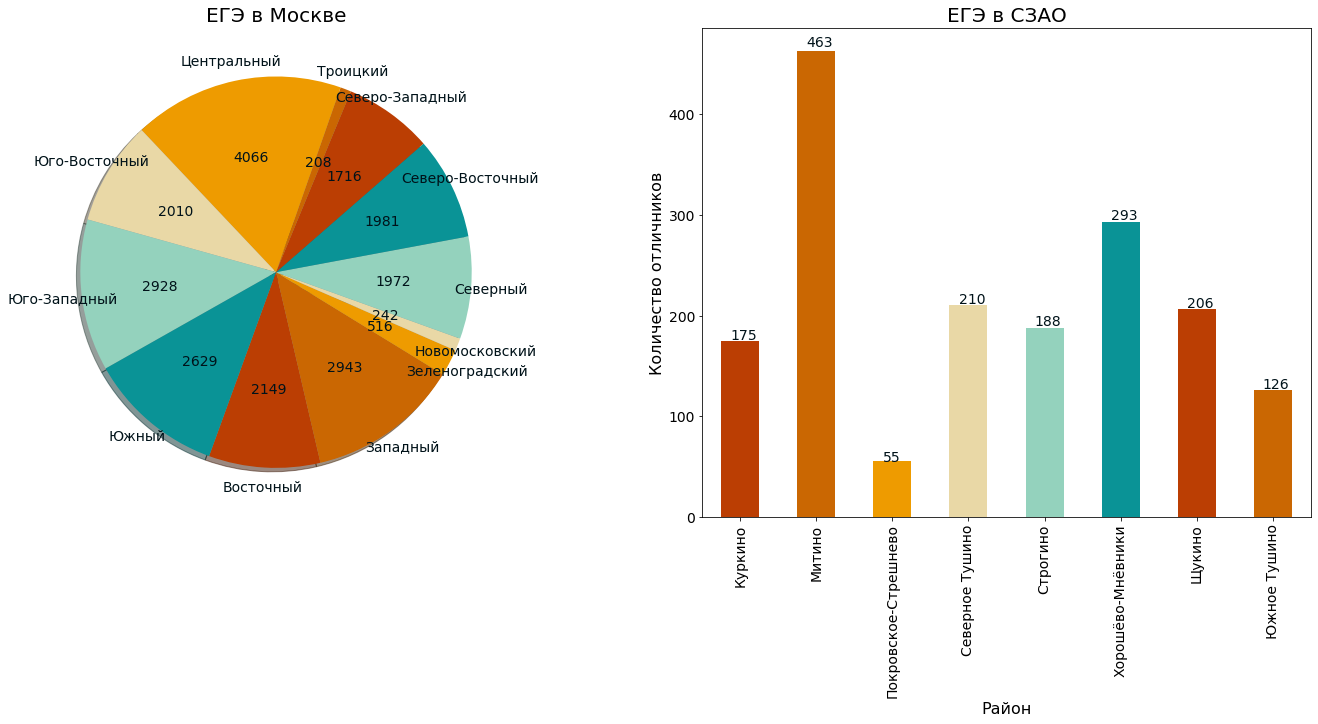

In [285]:
from matplotlib import lines
fig = plt.figure(figsize = (24,9))
area = fig.add_subplot(1, 2, 1)
style = ['#9b2226','#ae2012','#bb3e03','#ca6702','#ee9b00','#e9d8a6','#94d2bd','#0a9396','#005f73','#001219']
total = sum(adm_msk['PASSES_OVER_220'])
adm_msk['PASSES_OVER_220'].plot.pie(ax=area, label="",colors=style[2:-2],shadow=True, startangle=250, textprops={'fontsize': 14, 'va':'center', 'ha':'center', 'multialignment':'center', "rotation" : 0, "color" : style[-1]}, autopct=lambda x: int(total * x/100))
area.set_title("ЕГЭ в Москве", fontsize=20)

area = fig.add_subplot(1, 2, 2)
dist_sz.plot.bar(ax=area, label="", color=style[2:-2],linewidth=14 )
plt.rcParams['font.size'] = '14'
plt.xlabel('Район', fontsize=16)
plt.ylabel('Количество отличников', fontsize=16)
area.set_title("ЕГЭ в СЗАО", fontsize=20)
j = 0
for i in dist_sz:
    area.annotate(round(i), xy=(j-0.13,i*1.01) ,color=style[-1])
    j += 1
plt.show()

#альтернативная версия кода

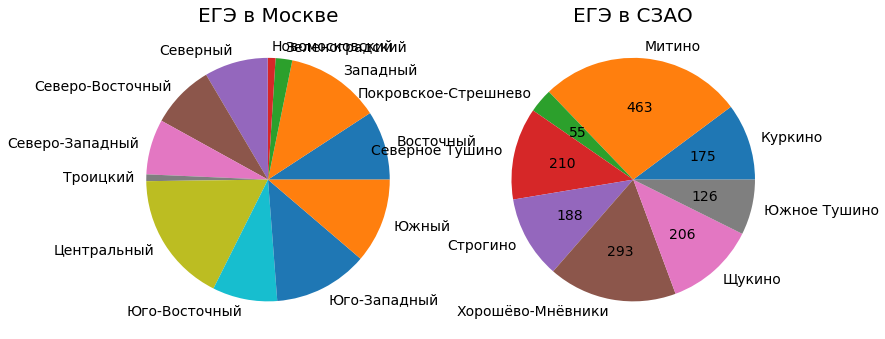

In [286]:
#подготовка данных
data = pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv", delimiter=";")
data["District"] = data["District"].str.replace("район ","").astype("category")
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0]).astype("category")
data = data.set_index("YEAR").loc["2018-2019"].reset_index()
#первый график
fig = plt.figure(figsize=(12,12))
area = fig.add_subplot(1, 2, 1)
area.set_title("ЕГЭ в Москве", fontsize=20)
data_adm = data.set_index("AdmArea")
data_adm["PASSES_OVER_220"].groupby("AdmArea").sum().plot.pie(ax=area, label="")
#второй график
area = fig.add_subplot(1, 2, 2)
area.set_title("ЕГЭ в СЗАО", fontsize=20)
data_district = data_adm.loc["Северо-Западный"].reset_index().set_index("District")
data_district = data_district["PASSES_OVER_220"].groupby("District").sum()
total = sum(data_district)
data_district.plot.pie(ax=area, label="", autopct=lambda x:int(round(total * x/100)))
plt.show()